# DATA DESCRIPTION (Target: Attrition)
|Features: 
*   Employee_ID: Unique identifier for each employee. 
*   Age: Age of the employee. 
*   Gender: Gender of the employee. 
*   Marital_Status: Marital status of the employee (Single, Married, Divorced). 
*   Department: Department the employee works in (e.g., HR, IT, Sales, Marketing). 
*   Job_Role: Specific role within the department (e.g., Manager, Analyst). 
*   Job_Level: Level in the organizational hierarchy. 
*   Monthly_Income: Monthly salary of the employee. 
*   Hourly_Rate: Rate per hour for hourly employees. 
*   Years_at_Company: Number of years the employee has been with the company. 
*   Years_in_Current_Role: Number of years the employee has been in their current role. 
*   Years_Since_Last_Promotion: Time since the employee’s last promotion. 
*   Work_Life_Balance: Rating of work-life balance. 
*   Job_Satisfaction: Rating of job satisfaction (1-5 scale). 
*   Performance_Rating: Performance rating (1-5 scale). 
*   Training_Hours_Last_Year: Number of training hours completed in the past year. 
*   Overtime: Whether the employee works overtime (Yes/No). 
*   Project_Count: Number of projects managed by the employee. 
*   Average_Hours_Worked_Per_Week: Average working hours per week. 
*   Absenteeism: Number of days the employee was absent in the past year. 
*   Work_Environment_Satisfaction: Rating of work environment satisfaction. 
*   Relationship_with_Manager: Rating of the relationship with the manager. 
*   Job_Involvement: Rating of job involvement. 
*   Distance_From_Home: Distance from home to the workplace (in kilometers). 
*   Number_of_Companies_Worked: Total number of companies the employee has worked for.


In [35]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [36]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv "
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [37]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [38]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [39]:
# Calculate null values and percentage
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Create a DataFrame for columns with null values
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Filter for columns with null values
null_df = null_df[null_df['Null Count'] > 0]


# Format the percentage with two decimal places and % symbol
null_df['Null Percentage'] = null_df['Null Percentage'].map('{:.2f}%'.format)


null_df

,Null Count,Null Percentage


NO MISSING VALUES

# Preprocessing

In [40]:
print(df.columns.tolist())

['Employee_ID', 'Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition']


In [41]:
# checking data
print("Total unique Gender:", df['Gender'].nunique())
print("Total unique Marital_Status:", df['Marital_Status'].nunique())
print("Total unique Department:", df['Department'].nunique())
print("Total unique Job_Role:", df['Job_Role'].nunique())
print("Total unique Job_Level:", df['Job_Level'].nunique())
print("Total unique Monthly_Income:", df['Monthly_Income'].nunique())
print("Total unique Hourly_Rate:", df['Hourly_Rate'].nunique())
print("Total unique Years_at_Company:", df['Years_at_Company'].nunique())
print("Total unique Years_in_Current_Role:", df['Years_in_Current_Role'].nunique())
print("Total unique Years_Since_Last_Promotion:", df['Years_Since_Last_Promotion'].nunique())
print("Total unique Work_Life_Balance:", df['Work_Life_Balance'].nunique())
print("Total unique Job_Satisfaction:", df['Job_Satisfaction'].nunique())
print("Total unique Performance_Rating:", df['Performance_Rating'].nunique())
print("Total unique Training_Hours_Last_Year:", df['Training_Hours_Last_Year'].nunique())
print("Total unique Overtime:", df['Overtime'].nunique())
print("Total unique Project_Count:", df['Project_Count'].nunique())
print("Total unique Average_Hours_Worked_Per_Week:", df['Average_Hours_Worked_Per_Week'].nunique())
print("Total unique Absenteeism:", df['Absenteeism'].nunique())
print("Total unique Work_Environment_Satisfaction:", df['Work_Environment_Satisfaction'].nunique())
print("Total unique Relationship_with_Manager:", df['Relationship_with_Manager'].nunique())
print("Total unique Job_Involvement:", df['Job_Involvement'].nunique())
print("Total unique Distance_From_Home:", df['Distance_From_Home'].nunique())
print("Total unique Number_of_Companies_Worked:", df['Number_of_Companies_Worked'].nunique())

Total unique Gender: 2
Total unique Marital_Status: 3
Total unique Department: 5
Total unique Job_Role: 4
Total unique Job_Level: 5
Total unique Monthly_Income: 971
Total unique Hourly_Rate: 85
Total unique Years_at_Company: 29
Total unique Years_in_Current_Role: 14
Total unique Years_Since_Last_Promotion: 10
Total unique Work_Life_Balance: 4
Total unique Job_Satisfaction: 5
Total unique Performance_Rating: 4
Total unique Training_Hours_Last_Year: 100
Total unique Overtime: 2
Total unique Project_Count: 9
Total unique Average_Hours_Worked_Per_Week: 30
Total unique Absenteeism: 20
Total unique Work_Environment_Satisfaction: 4
Total unique Relationship_with_Manager: 4
Total unique Job_Involvement: 4
Total unique Distance_From_Home: 49
Total unique Number_of_Companies_Worked: 4


In [ ]:
# Drop Employee_ID as it's only an identifier
# Drop Hourly_Rate as Monthly_Income is usually a stronger and more comprehensive predictor of an employee's financial satisfaction
# Drop Average_Hours_Worked_Per_Week as the Overtime (Yes/No) column already capture the negative impact of a high workload.
# Drop Years_in_Current_Role and Years_Since_Last_Promotion because data can be redundant for workers who havent changed roles or havent gotten their promotions

df = df.drop(columns=['Employee_ID','Hourly_Rate', 'Average_Hours_Worked_Per_Week','Years_in_Current_Role', 'Years_Since_Last_Promotion'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Work_Life_Balance              1000 non-null   int64 
 9   Job_Satisfaction               1000 non-null   int64 
 10  Performance_Rating             1000 non-null   int64 
 11  Training_Hours_Last_Year       1000 non-null   int64 
 12  Overtime                       1000 non-null   object
 13  Proj

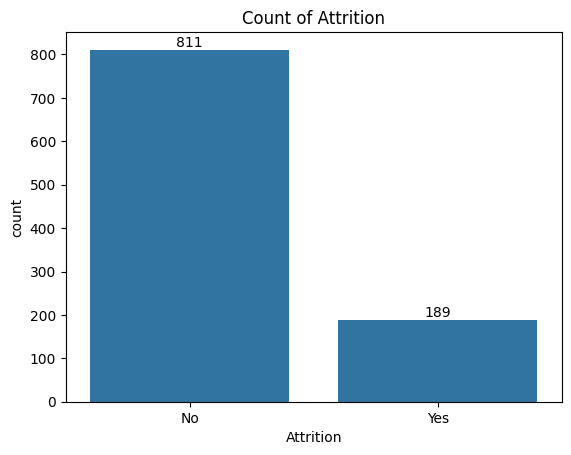

In [43]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

# Feature Encoding

In [44]:
# Check the unique values of your ordinal columns
print("Job_Satisfaction values:", df['Job_Satisfaction'].unique())
print("Job_Level values:", df['Job_Level'].unique())
print("Performance_Rating values:", df['Performance_Rating'].unique())
print("Work_Life_Balance values:", df['Work_Life_Balance'].unique())

Job_Satisfaction values: [3 1 2 5 4]
Job_Level values: [1 5 3 2 4]
Performance_Rating values: [4 1 3 2]
Work_Life_Balance values: [1 2 3 4]


In [45]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

binary_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in binary_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Ordinal Encoding = no need


# 3. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Marital_Status', 'Department', 'Job_Role']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
95,28,1,0.0,1.0,0.0,5,7103,7,2,3,2,61,1,4,1,3,2,3,12,2,0
316,42,1,2.0,1.0,0.0,2,4813,2,3,1,1,51,0,4,12,4,4,4,29,1,1
305,42,0,2.0,0.0,1.0,5,13361,28,3,4,1,84,1,5,14,3,1,1,45,2,0
736,47,0,2.0,4.0,0.0,1,19053,15,2,5,4,30,0,5,14,3,1,4,29,3,1
71,37,1,0.0,3.0,0.0,1,18560,23,2,1,4,64,0,7,2,4,1,2,43,2,0


In [46]:
# checking encode result
df.loc[480]

Age                                     31
Gender                              Female
Marital_Status                      Single
Department                       Marketing
Job_Role                           Manager
Job_Level                                5
Monthly_Income                        4191
Years_at_Company                        18
Work_Life_Balance                        2
Job_Satisfaction                         1
Performance_Rating                       3
Training_Hours_Last_Year                13
Overtime                               Yes
Project_Count                            2
Absenteeism                              5
Work_Environment_Satisfaction            1
Relationship_with_Manager                3
Job_Involvement                          2
Distance_From_Home                       1
Number_of_Companies_Worked               1
Attrition                               No
Name: 480, dtype: object

## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).


**Reasoning**:
Define the features (X) by dropping the target variable 'Attrition' from the DataFrame and define the target variable (y) as the 'Attrition' column.



In [47]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [48]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,15,1,3,4,14,0,6,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,6,2,1,1,6,1,2,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,3,2,1,77,1,6,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,10,3,5,4,49,0,9,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,29,2,5,1,64,0,3,0,4,1,3,44,3


In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

## Split data

### Subtask:
Split the encoded data into training and testing sets.


**Reasoning**:
Split the encoded feature DataFrame X and the target Series y into training and testing sets.



In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 20), (300, 20))

In [52]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,41,0,1.0,3.0,1.0,2,6144,21,2,3,2,14,0,8,13,1,1,4,34,2
68,59,0,2.0,4.0,2.0,3,3935,7,2,2,1,39,0,7,12,3,2,4,19,2
479,56,0,1.0,4.0,3.0,1,15478,17,4,3,2,35,0,3,6,2,4,4,5,2
399,49,1,1.0,1.0,3.0,4,9040,29,1,4,1,16,1,9,17,4,3,4,45,1
434,52,0,2.0,3.0,0.0,1,11219,21,3,5,1,57,0,3,10,2,4,3,45,3


In [53]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Years_at_Company,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,24,1,0.0,0.0,3.0,2,16465,10,4,2,4,6,1,7,18,2,2,3,8,4
859,25,0,0.0,1.0,0.0,5,18871,16,4,1,1,4,0,3,4,1,4,4,19,3
298,43,1,1.0,0.0,2.0,4,11226,26,2,4,4,34,1,6,7,2,3,2,32,1
553,58,0,0.0,4.0,1.0,3,18859,8,1,3,4,89,0,8,3,2,2,3,17,3
672,31,0,2.0,4.0,3.0,3,10509,23,3,1,3,79,0,7,7,4,1,4,36,1


# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       245
           1       0.14      0.16      0.15        55

    accuracy                           0.66       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.68      0.66      0.67       300



# What to do next?
Fix Overfitting: The model is memorizing the data, showing 100% accuracy on the training set but only 66% on the test set. We'll fix this by pruning the tree (e.g., setting a max_depth). <br>

Handle Imbalance: The model can't predict employees who leave (the F1-score is only 0.21 for them). We need to continue using a technique like SMOTE to balance the data.<br>

Select Features: To further simplify the model and help with overfitting, we'll drop the least important features.<br>

# Oversampling using SMOTENC

In [55]:
print(df.columns.tolist())

['Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role', 'Job_Level', 'Monthly_Income', 'Years_at_Company', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime', 'Project_Count', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition']


In [133]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make 
# oversampling more accurate
categorical_features = [
    'Gender', 'Marital_Status', 'Department', 'Job_Role', 
    'Job_Level', 'Years_at_Company', 'Work_Life_Balance', 
    'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 
    'Overtime', 'Project_Count', 'Absenteeism', 
    'Work_Environment_Satisfaction', 'Relationship_with_Manager', 
    'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1216, 20), (406, 20))

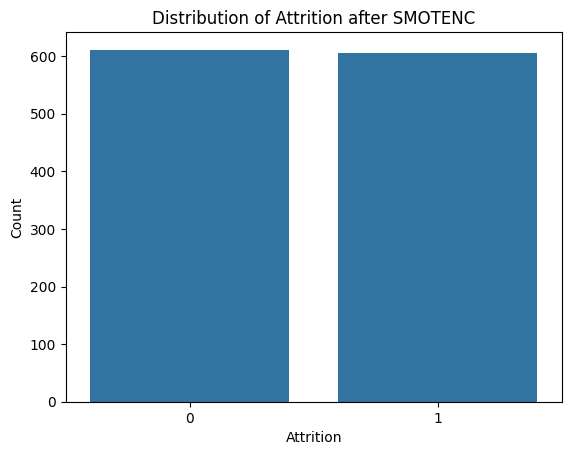

In [134]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Work_Life_Balance              1000 non-null   int64 
 9   Job_Satisfaction               1000 non-null   int64 
 10  Performance_Rating             1000 non-null   int64 
 11  Training_Hours_Last_Year       1000 non-null   int64 
 12  Overtime                       1000 non-null   object
 13  Proj

In [135]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       605

    accuracy                           1.00      1216
   macro avg       1.00      1.00      1.00      1216
weighted avg       1.00      1.00      1.00      1216


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       200
           1       0.67      0.68      0.68       206

    accuracy                           0.67       406
   macro avg       0.67      0.67      0.67       406
weighted avg       0.67      0.67      0.67       406



Wow the performance is getting higher, but i want to handle overfitting by using KFold Cross Validation

# KFold Cross Validation

In [136]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


In [137]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 1), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.71341463 0.69364162 0.61490683 0.67857143 0.6827957 ]
Average score: 0.68


In [138]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [11, 22, 33]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 11}
Best cross-validation f1 score: 0.670


ok now the f1 score is 67% but i want to try with other way using feature importance, wish the result will be better

# Feature Importance

In [139]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.10656309 0.01440995 0.02803141 0.01430777 0.053266   0.05998866
 0.14234606 0.07594524 0.0321813  0.02357092 0.03747603 0.08033595
 0.01233193 0.05059736 0.05919458 0.0138293  0.02312679 0.04321998
 0.0859778  0.04329987]


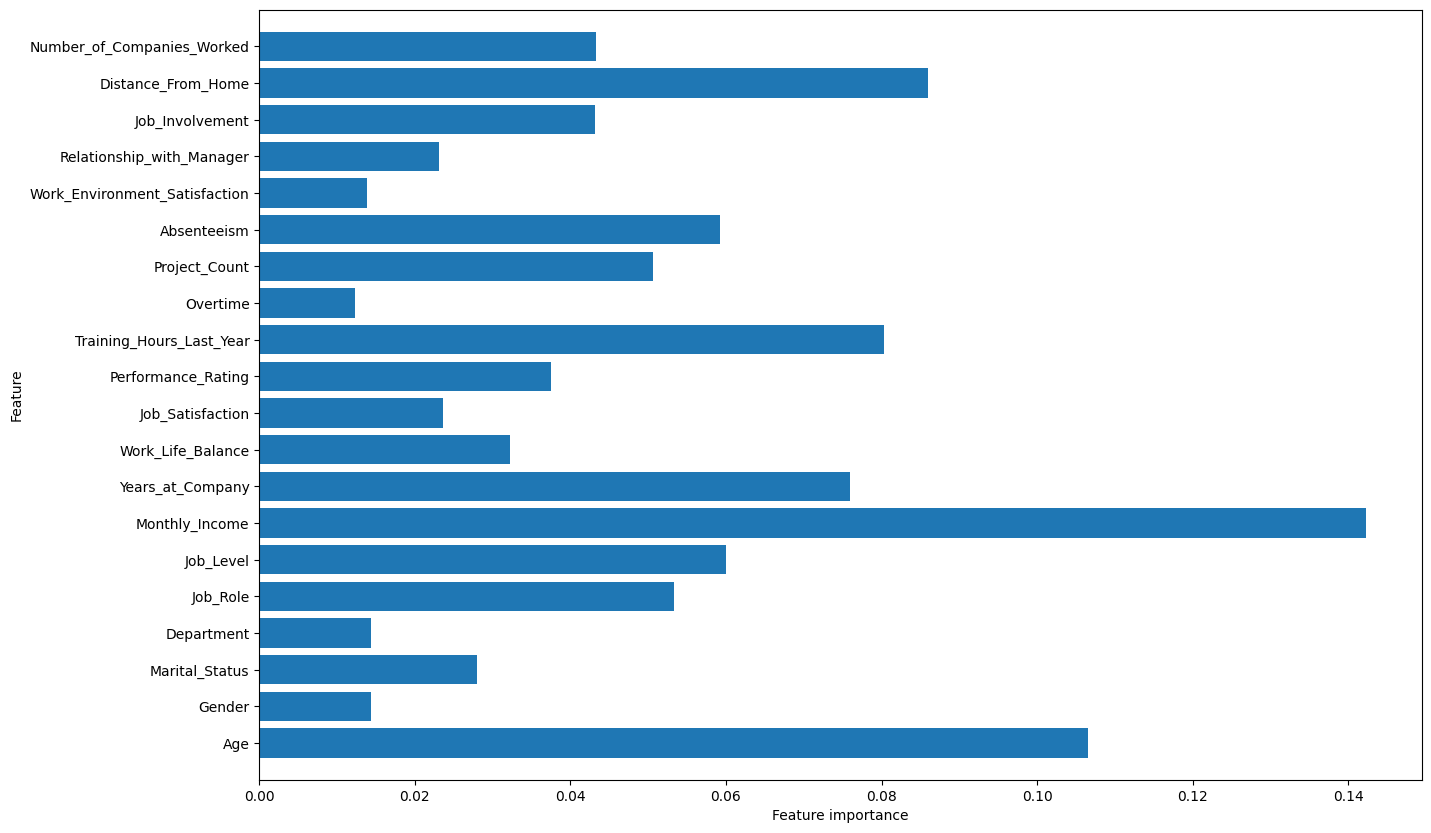

In [140]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [142]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

Monthly_Income              0.142346
Age                         0.106563
Distance_From_Home          0.085978
Training_Hours_Last_Year    0.080336
Years_at_Company            0.075945
Job_Level                   0.059989
Absenteeism                 0.059195
Job_Role                    0.053266
Project_Count               0.050597
dtype: float64

In [143]:
# using only important features for the prediction
important_features = ['Monthly_Income',
    'Age',
    'Distance_From_Home',
    'Training_Hours_Last_Year',
    'Years_at_Company',
    'Job_Role',
    'Project_Count',
    'Absenteeism',
    'Job_Level']
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [144]:
display(X_importance)
display(y_importance)

,Monthly_Income,Age,Distance_From_Home,Training_Hours_Last_Year,Years_at_Company,Job_Role,Project_Count,Absenteeism,Job_Level
0,15488,58,20,14,15,3.0,6,17,1
1,13079,48,25,6,6,1.0,2,1,5
2,13744,34,45,77,24,1.0,6,2,1
3,6809,27,35,49,10,3.0,9,18,1
4,10206,40,44,64,29,2.0,3,0,1
...,...,...,...,...,...,...,...,...,...
995,4172,27,24,76,24,0.0,4,10,2
996,11007,47,39,53,19,3.0,7,16,4
997,4641,50,33,7,25,2.0,1,9,1
998,19855,28,41,54,13,2.0,4,17,4


0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: Attrition, Length: 1000, dtype: int64

In [146]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X_importance, 
    y_importance, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_importance
)

categorical_feature_names = ['Job_Role', 'Job_Level', 'Project_Count', 'Absenteeism']
categorical_features_indices = [X_train.columns.get_loc(col) for col in categorical_feature_names]

print("Class distribution before oversampling:\n", y_train.value_counts())

smotenc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train, y_train)

print("\nClass distribution after oversampling:\n", pd.Series(y_train_resampled).value_counts())

print("\nShape of resampled training set:", X_train_resampled.shape)
print("Shape of original test set:", X_test.shape)

Class distribution before oversampling:
 Attrition
0    649
1    151
Name: count, dtype: int64

Class distribution after oversampling:
 Attrition
0    649
1    649
Name: count, dtype: int64

Shape of resampled training set: (1298, 9)
Shape of original test set: (200, 9)


In [147]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       144

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       255
           1       0.15      0.20      0.17        45

    accuracy                           0.71       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.74      0.71      0.73       300



i still want to increase the score since this way is seems worse than before, so i will try to select predictor or X features based on the correlation

# Selecting Predictors/Features Based on Correlation

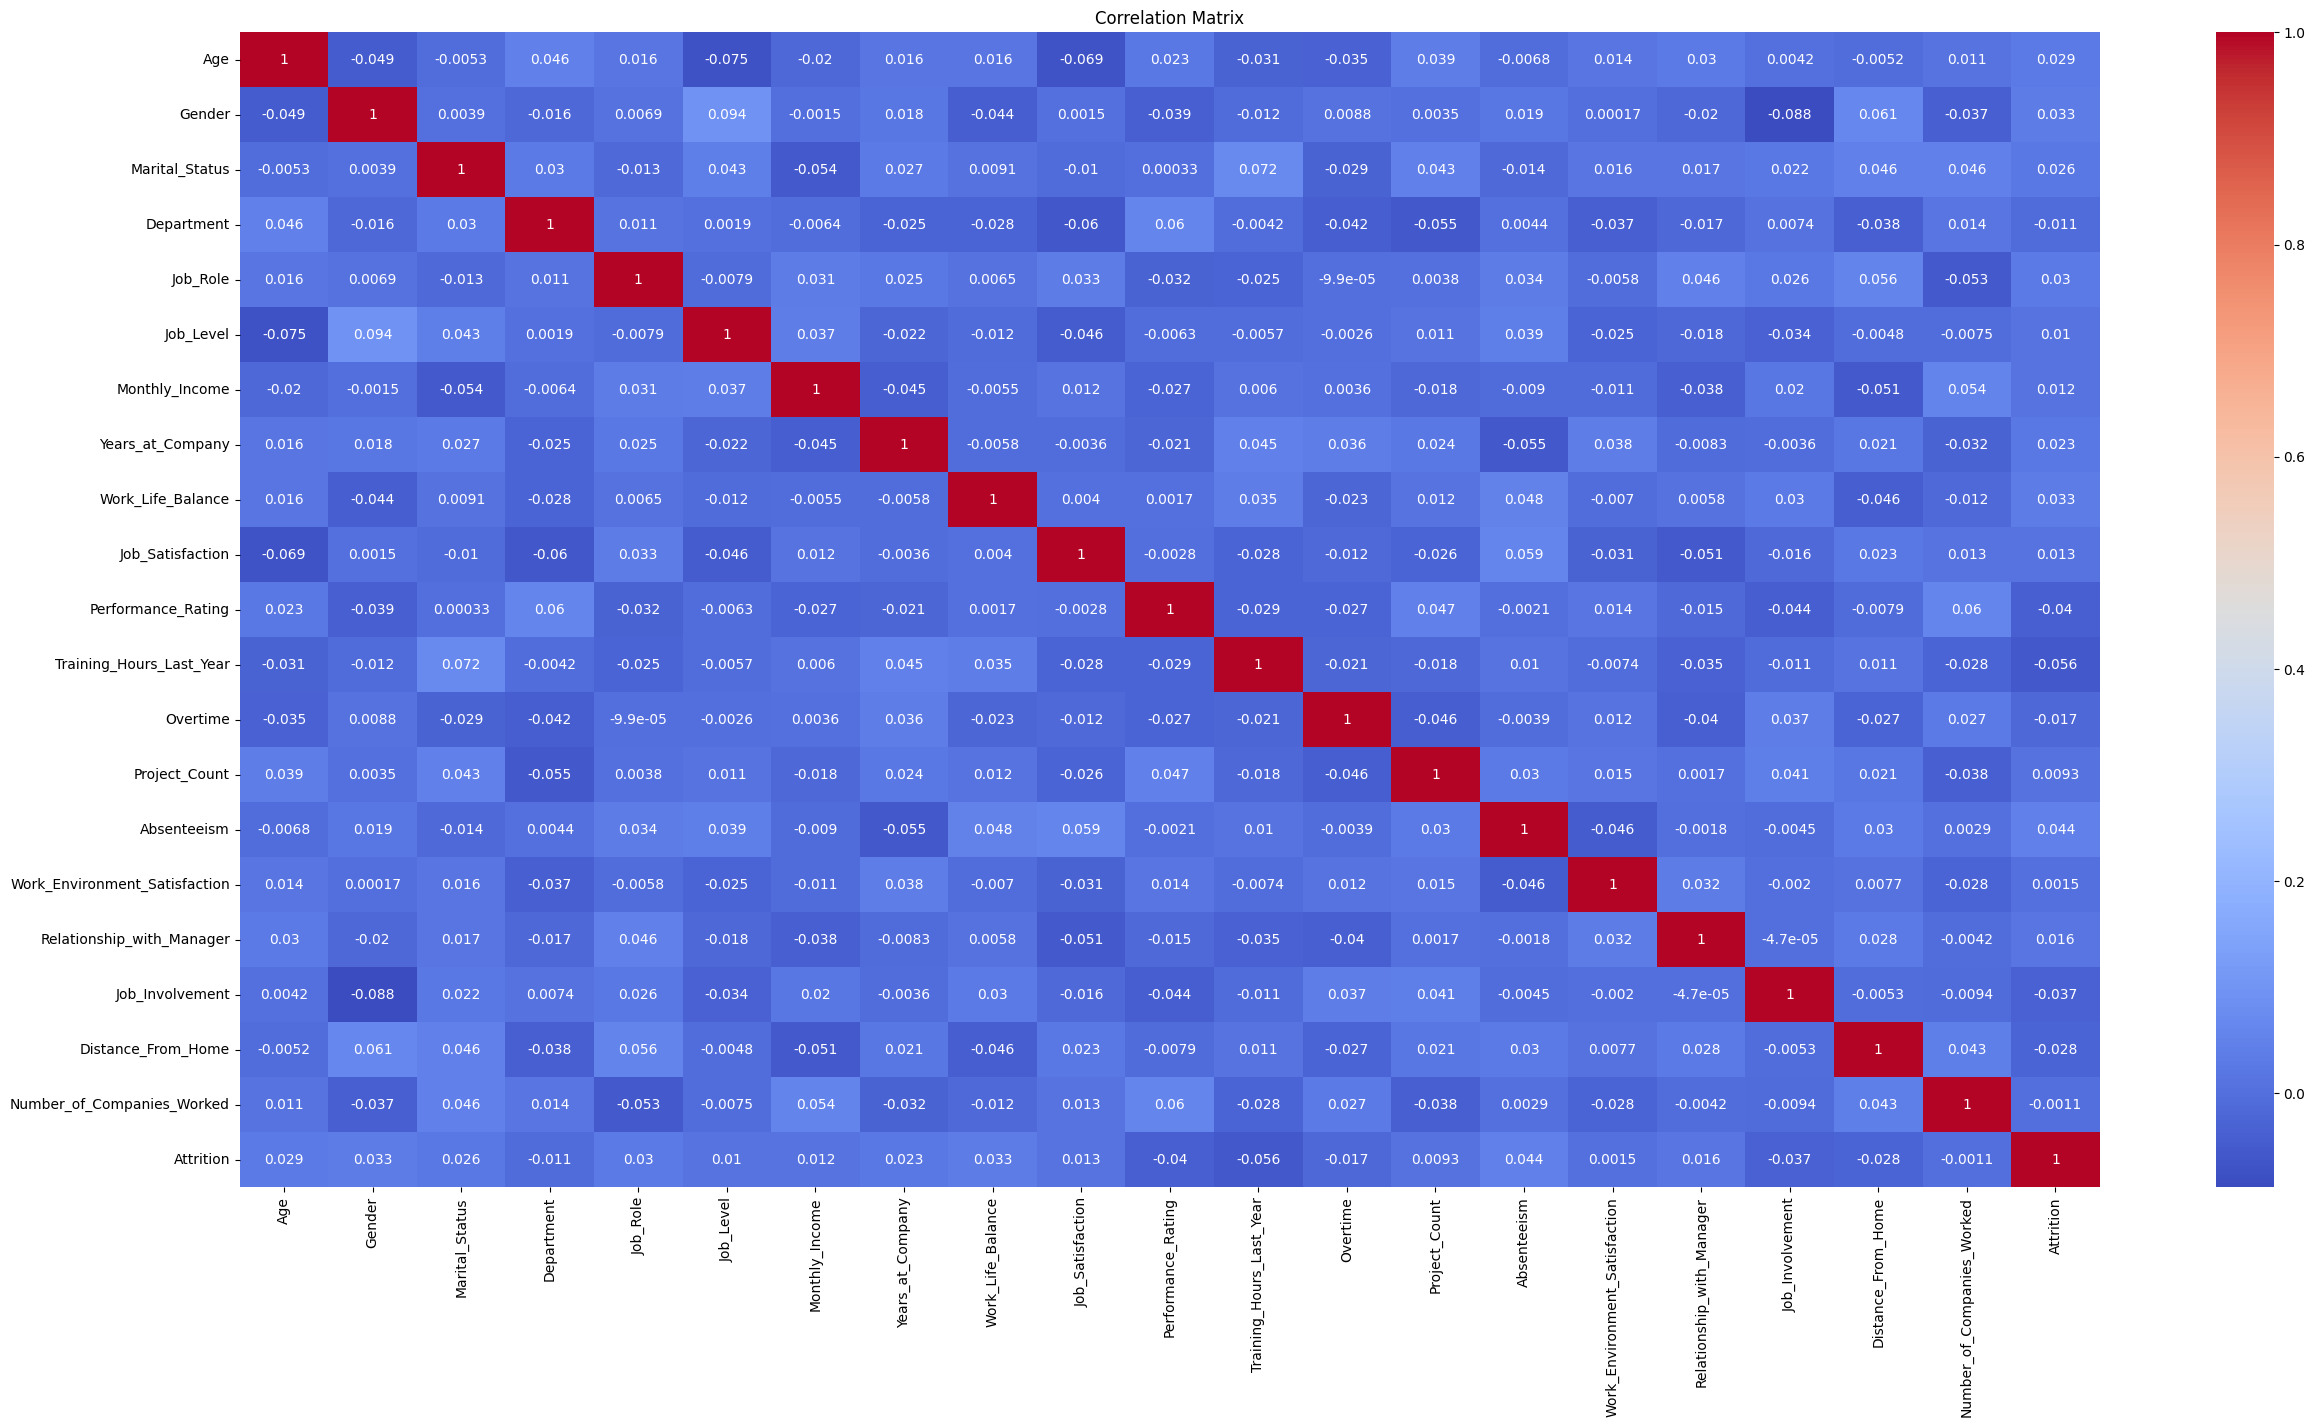

In [148]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Because nothing is high correlation, i will pick the correlation that is either -0.06 and up or 0.06 and up
#  I only choose some of the highest correlations and if there are two predictors have high correlation, i will only choose one with higher correlation
# For the example JobLevel and MonthlyIncome, i only choose JobLevel

heatmap_features = ['Job_Level', 'Job_Involvement', 'Job_Satisfaction', 'Gender', 'Age', 
                    'Department']
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['Attrition'] #target

In [164]:
X_train, X_test, y_train, y_test = train_test_split(
    X_heatmap, 
    y_heatmap, 
    test_size=0.2, 
    random_state=1, 
    stratify=y_heatmap
)

categorical_feature_names = [
    'Job_Level', 
    'Job_Involvement', 
    'Job_Satisfaction', 
    'Gender', 
    'Department'
]

categorical_features_indices = [X_train.columns.get_loc(col) for col in categorical_feature_names]
print("Class distribution before oversampling:\n", y_train.value_counts())

smotenc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train, y_train)

print("\nClass distribution after oversampling:\n", pd.Series(y_train_resampled).value_counts())
print("\nShape of resampled training set:", X_train_resampled.shape)
print("Shape of original test set:", X_test.shape)

Class distribution before oversampling:
 Attrition
0    649
1    151
Name: count, dtype: int64

Class distribution after oversampling:
 Attrition
0    649
1    649
Name: count, dtype: int64

Shape of resampled training set: (1298, 6)
Shape of original test set: (200, 6)


In [165]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       649
           1       1.00      0.99      0.99       151

    accuracy                           1.00       800
   macro avg       1.00      0.99      1.00       800
weighted avg       1.00      1.00      1.00       800


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       162
           1       0.25      0.24      0.24        38

    accuracy                           0.72       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.71      0.72      0.72       200



thank God the performance increases, The F1-score for class 1 (the employees who leave) jumped from 0.17 to 0.24. This is a significant improvement and shows the model is getting better at its primary task. And There was a slight increase from 71% to 72%.

ok now i will try to do parameter tuning using GridSearchCV

# Hyperparameter Tuning using Grid Search

In [169]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [12,16,17,18,19,20]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train_resampled, y_train_resampled)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 17}
Best cross-validation f1 score: 0.726


thank God the performance is getting better from 67% to 72.6% and for the last step i will show you the classification report

In [171]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       649
           1       0.80      0.55      0.65       151

    accuracy                           0.89       800
   macro avg       0.85      0.76      0.79       800
weighted avg       0.88      0.89      0.88       800


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       162
           1       0.15      0.08      0.10        38

    accuracy                           0.74       200
   macro avg       0.48      0.49      0.48       200
weighted avg       0.68      0.74      0.71       200



# THANK YOUUUU